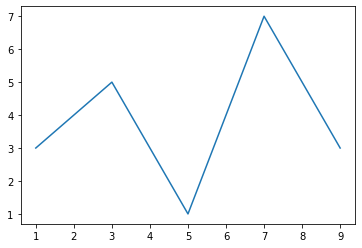

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
x = [1,3,5,7,9]
y = [3,5,1,7,3]
np.array(y)
plt.plot(x,y)
plt.show()